## Hypothesis Testing Assignment

In [59]:
#Importing necessary packages
import pandas as pd
import numpy as np
import datetime as dt
# package with hypothesis tests
import scipy.stats as st

### Data

You can download the data from [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing&resourcekey=0-16O9Fc5eaJH99-M7AHqHOg). The data contains results of all NBA games from seasons 2013/2014 to 2015/2016.

In [60]:
nba_df = pd.read_csv('nba_games_2013_2015.csv', delimiter=';')

--------------
### Task 1
Split the data into **3** separate dataframes for each NBA season!

In [61]:
# convert game_date to string and parse as datetime objects
nba_df['GAME_DATE'] = pd.to_datetime(nba_df['GAME_DATE'].astype('string'))

In [62]:
nba_df.to_json('nba_data.json')
seasons = pd.Series(pd.to_datetime(['2013-06', '2014-06', '2015-06', '2016-06']))

In [63]:
nba_2014 = nba_df.loc[(nba_df['GAME_DATE'] > seasons[0]) & (nba_df['GAME_DATE'] < seasons[1])]
nba_2015 = nba_df.loc[(nba_df['GAME_DATE'] > seasons[1]) & (nba_df['GAME_DATE'] < seasons[2])]
nba_2016 = nba_df.loc[(nba_df['GAME_DATE'] > seasons[2]) & (nba_df['GAME_DATE'] < seasons[3])]

---------------
### Task 2
Test the hypothesis that the offensive productions stats of the Cleveland Cavaliers and Golden State Warriors (the teams that met in the finals that year) were from the same distribution in the 2015/2016 season.

Offensive production refers to two variables: **PTS (Points)** and **FG_PCT (Field Goal Percentage)**. We will need to do two separate hypothesis tests, one for each variable.

In [64]:
# assuming alpha...
alpha = 0.05

# let's evaluate the teams
gsw_stats = nba_2016.loc[nba_2016['TEAM_NAME'] == 'Golden State Warriors', :]
cle_stats = nba_2016.loc[nba_2016['TEAM_NAME'] == 'Cleveland Cavaliers', :]

In [65]:
# check for normal distribution, null hypothesis being a normal distribution
gsw_stats_npts = st.shapiro(gsw_stats['PTS'])
cle_stats_npts = st.shapiro(cle_stats['PTS'])

gsw_stats_nfg = st.shapiro(gsw_stats['FG_PCT'])
cle_stats_nfg = st.shapiro(cle_stats['FG_PCT'])

print(f'PTS: p-value: {gsw_stats_npts[1]}') # sufficiently large p-value, not enough evidence against null
print(f'PTS: p-value: {cle_stats_npts[1]}') # sufficiently large p-value, not enough evidence against null

print(f'FG_PCT: p-value: {gsw_stats_nfg[1]}') # sufficiently large p-value, not enough evidence against null
print(f'FG_PCT: p-value: {cle_stats_nfg[1]}') # sufficiently large p-value, not enough evidence against null

PTS: p-value: 0.19267801940441132
PTS: p-value: 0.31675779819488525
FG_PCT: p-value: 0.5294530987739563
FG_PCT: p-value: 0.6508476734161377


In [66]:
# perform t-tests on pts and fg
pts_ttest = st.ttest_ind(gsw_stats['PTS'], cle_stats['PTS'])
fg_ttest = st.ttest_ind(gsw_stats['FG_PCT'], cle_stats['FG_PCT'])

# compare p-values to alpha = 0.05 for both statistics
if pts_ttest[1] < alpha:
  print(f'A p-value evide of {round(pts_ttest[1], 10)} provides evidence against the original hypothesis that GSW\'s and CLE\'s Points were from the same distribution.')
else:
  print(f'A p-value of {round(pts_ttest[1], 10)} provides evidence against the original hypothesis that GSW\'s and CLE\'s Points were from the same distribution.')
  
if fg_ttest[1] < alpha:
  print(f'A p-value of {round(fg_ttest[1], 5)} providesnce against the original hypothesis that GSW\'s and CLE\'s Field Goal Percentages were from the same distribution.')
else:
  print(f'A p-value of {round(fg_ttest[1], 5)} provides evidence against the original hypothesis that GSW\'s and CLE\'s Field Goal Percentages were from the same distribution.')

A p-value evide of 1.42e-08 provides evidence against the original hypothesis that GSW's and CLE's Points were from the same distribution.
A p-value of 0.00206 providesnce against the original hypothesis that GSW's and CLE's Field Goal Percentages were from the same distribution.


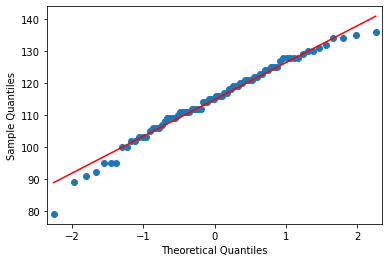

In [67]:
# quick check using 'qqplot' for normal distribution

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

PopPTS = gsw_stats['PTS']
qqplot(PopPTS, line='s')
pyplot.show()

-----------------
### Task 3
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers changed significantly after the head coach changed in the 2015/2016 season.

- **Coach Blatt was fired on 24th of Jan, 2016**. 

Use the data from seasons 2014/2015 and 2015/2016 - those are years when Cleveland was coached by Blatt. 

**We have two possible solutions to try here:**
- Take the same amount of games from before and after and try t-test.
- Take all the games from before and after and look for the right test to compare two samples with different sizes. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [104]:
# taking the same sample size before and after blatt's period
blatt_before = cle_stats[cle_stats['GAME_DATE'] < pd.to_datetime('2016-01-24')].sample(40)
blatt_after = cle_stats[cle_stats['GAME_DATE'] > pd.to_datetime('2016-01-24')].sample(40)

# comparing against normal distribution to check the null hypothesis 
# and reasonably conlcude that each statistic follows a normal curve
blatt_nbefore = st.shapiro(blatt_before['PTS']) # check for norm dist
blatt_nafter = st.shapiro(blatt_after['PTS']) # check for norm dist

print(blatt_nbefore)
print(blatt_nafter)

ShapiroResult(statistic=0.9832336902618408, pvalue=0.8066796064376831)
ShapiroResult(statistic=0.967939555644989, pvalue=0.3090731203556061)


In [105]:
# checking null hypothesis that Blatt had no significant impact on Cleveland's offensive abilities
blatt_ttest = st.ttest_ind(blatt_before['PTS'], blatt_after['PTS'])

if blatt_ttest[1] < alpha:
    print(f'p-value: {round(blatt_ttest[1], 5)} suggests that the difference in points between these periods is statistically significant.')
else:
    print(f'p-value: {round(blatt_ttest[1], 5)} suggests that the difference in points between these periods is not statistically significant.')

p-value: 0.00357 suggests that the difference in points between these periods is statistically significant.


----------------


### Task 4
Download [**the similar dataset**](https://drive.google.com/file/d/0Bz9_0VdXvv9bRHhuRTI1aXBQcTA/view?usp=sharing&resourcekey=0-jGIaWyk0bXyECNSzB3x38w) with scores from playoff games in 2016.

In [108]:
# interpret csv dataset as a DataFrame
nba_po = pd.read_csv('nba_playoff_games_2016.csv', delimiter=';')

------------
### Task 5
Test the hypothesis that **number of blocks (BLK)** are from the same distribution in both the NBA playoffs and in the NBA regular season for 2015/2016 seaon for the **Toronto Raptors**. 

- We will be working with two samples with different sizes again.

In [122]:
# isolate Raptors stats from the PO and regular seasons
raptors_po = nba_po[nba_po['TEAM_NAME'] == 'Toronto Raptors']
raptors_2016 = nba_2016[nba_2016['TEAM_NAME'] == 'Toronto Raptors']

In [138]:
#function to determine normality
def check_normality(stat):
    
    pval = st.shapiro(stat)[1]
    if pval > alpha:
        print('Follows a normal curve.')
    else:
        print('Not a normal distribution.')

In [139]:
# check for normality in both samples
check_normality(raptors_po['BLK'])
check_normality(raptors_2016['BLK'])

Follows a normal curve.
Follows a normal curve.


In [136]:
# given a non-normal distribution, a non-parametric test is to be applied
# a wilcoxon test is valid here if the sample sizes were the same, but they are not.
# given a non-normal distribution with unequal and small (< 20) samples sizes,
# it is recommend that a mannwhitneyu test is applied instead.

In [137]:
# here, st.ttest_ind will be applied with unequal variances given the different sample sizes
raptors_block = st.ttest_ind(raptors_po['BLK'], raptors_2016['BLK'], equal_var=False)

if raptors_block[1] > alpha:
    print(f'p-value: {round(raptors_block[1], 5)} suggests that the null hypothesis is true.')
else:
    print(f'p-value: {round(raptors_block[1], 5)} rejects the null hypothesis.')

p-value: 0.00114 rejects the null hypothesis.



-----------------
### Task 6
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers is equally distributed for all 3 seasons. 

- In this case, we need a hypothesis test that compares more than 2 distributions at the same. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [140]:
# isolate the Cavs for each season
cle_2014 = nba_2014[nba_2014['TEAM_NAME'] == 'Cleveland Cavaliers']
cle_2015 = nba_2015[nba_2015['TEAM_NAME'] == 'Cleveland Cavaliers']
cle_2016 = nba_2016[nba_2016['TEAM_NAME'] == 'Cleveland Cavaliers']

In [141]:
# isolate their points
cle_2014_pts = cle_2014['PTS']
cle_2015_pts = cle_2015['PTS']
cle_2016_pts = cle_2016['PTS']

In [142]:
# check for normality
check_normality(cle_2014_pts)
check_normality(cle_2015_pts)
check_normality(cle_2016_pts)

Follows a normal curve.
Follows a normal curve.
Follows a normal curve.


In [148]:
# with equal datasets, an ANOVA test can be applied
# check standard deviations between groups

print(np.std(cle_2014_pts))
print(np.std(cle_2015_pts))
print(np.std(cle_2016_pts))

# if the ratio of the largest variance to the smallest variance is < 1.5, the data is homoscedastic
# in this case...

homo = np.std(cle_2015_pts) / np.std(cle_2016_pts)
print(homo) # we're good to go

# test using ANOVA
st.f_oneway(cle_2014_pts, cle_2015_pts, cle_2016_pts)

# with p-value less than alpha, the null hypothesis can be rejected in favor of the alternative 
# that there is a statistically significant difference in distribution in Cleveland's point-
# scoring between these years

12.313015511301796
12.617025078529515
10.935570599774536
1.153760104551805


F_onewayResult(statistic=5.9200250318080885, pvalue=0.003087727119983984)

#### Follow Up
**Between which seasons can we see the significant difference?**

+ Unfortunatelly, this is not the output of an ANOVA test and further tests are needed to be run.
+ Note: Lebron James came back to the Cleveland Caveliers prior to season 2014/2015. We can use this fact to interpret our results correctly.

In [151]:
print(st.ttest_ind(cle_2014_pts, cle_2015_pts))
print(st.ttest_ind(cle_2014_pts, cle_2016_pts)) # <---
print(st.ttest_ind(cle_2015_pts, cle_2016_pts))

# the distribution between the 2014 and 2016 seasons seems to be statistically significant

Ttest_indResult(statistic=-2.508958204796911, pvalue=0.013091680534336523)
Ttest_indResult(statistic=-3.339057501969076, pvalue=0.0010431648992063256)
Ttest_indResult(statistic=-0.6442093460555935, pvalue=0.5203507617734474)
